In [2]:
import pandas as pd
import numpy as np
import folium 
import glob
import os
import re

In [3]:
pip install folium



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
data_outcome = pd.read_csv('/Users/sybren/Downloads/3d28d0e0e0ab8fc791bac73d4170c4f9e897d1a4/2020-04/2020-04-metropolitan-outcomes.csv')
data_stopandsearch = pd.read_csv('/Users/sybren/Downloads/3d28d0e0e0ab8fc791bac73d4170c4f9e897d1a4/2020-04/2020-04-metropolitan-stop-and-search.csv')
data_street = pd.read_csv('/Users/sybren/Downloads/barnet_street_data.csv')
data_street

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,0,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.206384,51.656731,On or near Alston Road,E01000248,Barnet 001A,Anti-social behaviour,NaN,NaN
1,1,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.203300,51.656468,On or near Chipping Close,E01000248,Barnet 001A,Anti-social behaviour,NaN,NaN
2,2,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.203300,51.656468,On or near Chipping Close,E01000248,Barnet 001A,Anti-social behaviour,NaN,NaN
3,3,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.204722,51.655249,On or near Stapylton Road,E01000248,Barnet 001A,Anti-social behaviour,NaN,NaN
4,4,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.203300,51.656468,On or near Chipping Close,E01000248,Barnet 001A,Anti-social behaviour,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
437462,437462,2e2f7fe556e0432f9ea7d47a7f61317fb4c60ec148029a...,2023-02,Metropolitan Police Service,Metropolitan Police Service,-0.207513,51.556601,On or near Horton Avenue,E01000143,Barnet 041D,Violence and sexual offences,Under investigation,NaN
437463,437463,5d444a3f043580ce820b22c2f172d8d9569c4cf4c87fb3...,2023-02,Metropolitan Police Service,Metropolitan Police Service,-0.207513,51.556601,On or near Horton Avenue,E01000143,Barnet 041D,Violence and sexual offences,Under investigation,NaN
437464,437464,9e370a3f3949f75a0cfbdcdc49446eddd0335511570343...,2023-02,Metropolitan Police Service,Metropolitan Police Service,-0.209530,51.558125,On or near Howard Close,E01000143,Barnet 041D,Violence and sexual offences,Under investigation,NaN
437465,437465,5d444a3f043580ce820b22c2f172d8d9569c4cf4c87fb3...,2023-02,Metropolitan Police Service,Metropolitan Police Service,-0.207513,51.556601,On or near Horton Avenue,E01000143,Barnet 041D,Violence and sexual offences,Under investigation,NaN


In [5]:
path = glob.glob('/Users/sybren/Downloads/3d28d0e0e0ab8fc791bac73d4170c4f9e897d1a4/*')
files = []
for file in path:
    data_files = glob.glob(file + '/*.csv')
    files.append(data_files)

lst = [] 
outcome = []   
stop_and_search = []
street = []
for i in range(len(files)):
    for str in files[i]:
        print(str)
        if 'outcomes' in str:
            outcome.append(str)
        if 'stop' in str:
            stop_and_search.append(str)
        if 'street' in str:
            street.append(str)

/Users/sybren/Downloads/3d28d0e0e0ab8fc791bac73d4170c4f9e897d1a4/2020-06/2020-06-metropolitan-stop-and-search.csv
/Users/sybren/Downloads/3d28d0e0e0ab8fc791bac73d4170c4f9e897d1a4/2020-06/2020-06-metropolitan-street.csv
/Users/sybren/Downloads/3d28d0e0e0ab8fc791bac73d4170c4f9e897d1a4/2020-06/2020-06-metropolitan-outcomes.csv
/Users/sybren/Downloads/3d28d0e0e0ab8fc791bac73d4170c4f9e897d1a4/2020-08/2020-08-metropolitan-outcomes.csv
/Users/sybren/Downloads/3d28d0e0e0ab8fc791bac73d4170c4f9e897d1a4/2020-08/2020-08-metropolitan-stop-and-search.csv
/Users/sybren/Downloads/3d28d0e0e0ab8fc791bac73d4170c4f9e897d1a4/2020-08/2020-08-metropolitan-street.csv
/Users/sybren/Downloads/3d28d0e0e0ab8fc791bac73d4170c4f9e897d1a4/2020-09/2020-09-metropolitan-stop-and-search.csv
/Users/sybren/Downloads/3d28d0e0e0ab8fc791bac73d4170c4f9e897d1a4/2020-09/2020-09-metropolitan-street.csv
/Users/sybren/Downloads/3d28d0e0e0ab8fc791bac73d4170c4f9e897d1a4/2020-09/2020-09-metropolitan-outcomes.csv
/Users/sybren/Download

In [6]:
li = []
for path in outcome:
    data = pd.read_csv(path, index_col=None, header=0)
    li.append(data)

df_outcome = pd.concat(li, axis=0, ignore_index=True)
df_outcome

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
li = []
for path in stop_and_search:
    data = pd.read_csv(path, index_col=None, header=0)
    li.append(data)

df_stop_and_search = pd.concat(li, axis=0, ignore_index=True)
df_stop_and_search

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2020-05-31T23:00:00+00:00,False,NaN,51.544736,-0.147623,Male,10-17,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
1,Person search,2020-05-31T23:00:00+00:00,False,NaN,51.540824,0.055394,Male,NaN,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
2,Person search,2020-05-31T23:00:00+00:00,False,NaN,51.540824,0.055394,Male,NaN,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
3,Person search,2020-05-31T23:01:00+00:00,False,NaN,51.570161,-0.008912,Male,25-34,Black/African/Caribbean/Black British - Any ot...,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,NaN
4,Person search,2020-05-31T23:01:00+00:00,False,NaN,51.570161,-0.008912,Male,over 34,Black/African/Caribbean/Black British - Any ot...,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677728,Person and Vehicle search,2020-11-30T23:50:00+00:00,False,NaN,51.446121,-0.240868,Female,25-34,Asian/Asian British - Any other Asian background,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
677729,Person search,2020-11-30T23:50:00+00:00,False,NaN,51.583674,0.170771,Male,NaN,Asian/Asian British - Bangladeshi,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
677730,Person search,2020-11-30T23:55:00+00:00,False,NaN,51.465313,-0.176842,Male,10-17,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
677731,Person search,2020-11-30T23:55:00+00:00,False,NaN,51.548314,-0.072189,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Community resolution,NaN,NaN


In [ ]:
li = []
for path in street:
    data = pd.read_csv(path, index_col=None, header=0)
    li.append(data)

df_street = pd.concat(li, axis=0, ignore_index=True)
df_street

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,9ebbe6bf4324a864b81f4db0ebbda1b6ae876a560b55fd...,2020-06,Metropolitan Police Service,Metropolitan Police Service,-0.640608,51.835074,On or near Grange Road,E01017701,Aylesbury Vale 009E,Violence and sexual offences,Status update unavailable,NaN
1,9c1b4839ab3d1d9d6e7e1b92410bb1cc4dc701271fe0fe...,2020-06,Metropolitan Police Service,Metropolitan Police Service,-1.007293,51.893136,On or near Prison,E01017674,Aylesbury Vale 010D,Other crime,Investigation complete; no suspect identified,NaN
2,e6b96084e693854a91a99fb4bff19323f6cac706242de6...,2020-06,Metropolitan Police Service,Metropolitan Police Service,-0.819735,51.798452,On or near Ebble Close,E01017724,Aylesbury Vale 020D,Violence and sexual offences,Status update unavailable,NaN
3,NaN,2020-06,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
4,NaN,2020-06,Metropolitan Police Service,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3358997,19307b07c44f36e9ec3942d92d50e717c8503b4c9b4366...,2020-11,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Violence and sexual offences,Investigation complete; no suspect identified,NaN
3358998,f09ebcda529f96ab9160698aa843705275a0eb0ee7fb04...,2020-11,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Violence and sexual offences,Investigation complete; no suspect identified,NaN
3358999,f77f3593094c6c5201af3358f29d2930403971804e8336...,2020-11,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,NaN
3359000,8d853e87a97780dc415ffd567f92048597a5175585e9fb...,2020-11,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,NaN


In [10]:
lats_longs  : list = []

for i in range(len(barnet_burg)):
    lats_longs.append([barnet_burg['Latitude'][i], barnet_burg['Longitude'][i]])

lats_longs

[[51.655538, -0.201877],
 [51.654317, -0.207853],
 [51.656348, -0.20251],
 [51.654768, -0.206779],
 [51.655223, -0.209537],
 [51.65753, -0.2116],
 [51.658642, -0.200207],
 [51.65855, -0.205936],
 [51.658207, -0.207656],
 [51.647366, -0.20551],
 [51.651621, -0.197406],
 [51.654324, -0.169875],
 [51.652621, -0.167905],
 [51.654909, -0.172786],
 [51.652621, -0.167905],
 [51.650015, -0.174356],
 [51.650299, -0.178753],
 [51.6497, -0.176696],
 [51.649529, -0.181892],
 [51.655005, -0.155896],
 [51.652419, -0.155596],
 [51.652137, -0.157661],
 [51.648987, -0.159205],
 [51.649122, -0.154646],
 [51.650331, -0.161752],
 [51.645551, -0.207389],
 [51.645551, -0.207389],
 [51.643302, -0.196724],
 [51.642316, -0.209916],
 [51.644683, -0.199994],
 [51.644683, -0.199994],
 [51.641503, -0.175204],
 [51.647937, -0.177764],
 [51.647285, -0.175766],
 [51.644325, -0.175654],
 [51.644121, -0.167163],
 [51.649163, -0.172178],
 [51.642338, -0.156699],
 [51.642338, -0.156699],
 [51.642338, -0.156699],
 [51.641

In [11]:
from folium.plugins import HeatMap

map_obj = folium.Map(location = [51.6254, -0.1527], zoom_start = 14)

HeatMap(lats_longs).add_to(map_obj)

map_obj

In [ ]:
pip install plotly


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import geojson
with open('/Users/sybren/Downloads/DataGeo kopie.json') as f:
    gj = geojson.load(f)
gj

{'type': 'Topology',
 'objects': {'E09000003': {"crs": {"properties": {"name": "urn:ogc:def:crs:OGC:1.3:CRS84"}, "type": "name"}, "geometries": [{"arcs": [[0, 1, 2, 3]], "coordinates": [], "id": "E02000024", "properties": {"MSOA11CD": "E02000024", "MSOA11NM": "Barnet 001"}, "type": "Polygon"}, {"arcs": [[4, 5, 6, -1, 7, 8]], "coordinates": [], "id": "E02000025", "properties": {"MSOA11CD": "E02000025", "MSOA11NM": "Barnet 002"}, "type": "Polygon"}, {"arcs": [[9, 10, -9, 11]], "coordinates": [], "id": "E02000026", "properties": {"MSOA11CD": "E02000026", "MSOA11NM": "Barnet 003"}, "type": "Polygon"}, {"arcs": [[-7, 12, 13, -2]], "coordinates": [], "id": "E02000027", "properties": {"MSOA11CD": "E02000027", "MSOA11NM": "Barnet 004"}, "type": "Polygon"}, {"arcs": [[14, 15, -13, -6, 16]], "coordinates": [], "id": "E02000028", "properties": {"MSOA11CD": "E02000028", "MSOA11NM": "Barnet 005"}, "type": "Polygon"}, {"arcs": [[-11, 17, 18, 19, -17, -5]], "coordinates": [], "id": "E02000029", "prop

In [ ]:
pip install --upgrade nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 9.0 MB/s eta 0:00:00
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.5/82.5 kB 4.9 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
barnet_burg = data_street.loc[data_street['Crime type'] == 'Burglary']

In [9]:
barnet_burg = barnet_burg.reset_index()

In [12]:
wards = pd.read_csv('/Users/sybren/Downloads/LSOA_(2021)_to_Ward_to_Lower_Tier_Local_Authority_(May_2022)_Lookup_for_England_and_Wales.csv')
wards

,ObjectId,LSOA21CD,LSOA21NM,WD22CD,WD22NM,WD22NMW,LTLA22CD,LTLA22NM,LTLA22NMW
0,1,E01000001,City of London 001A,E05009288,Aldersgate,NaN,E09000001,City of London,NaN
1,2,E01000002,City of London 001B,E05009302,Cripplegate,NaN,E09000001,City of London,NaN
2,3,E01000003,City of London 001C,E05009302,Cripplegate,NaN,E09000001,City of London,NaN
3,4,E01000005,City of London 001E,E05009308,Portsoken,NaN,E09000001,City of London,NaN
4,5,E01000006,Barking and Dagenham 016A,E05014066,Northbury,NaN,E09000002,Barking and Dagenham,NaN
...,...,...,...,...,...,...,...,...,...
35667,35668,W01002036,Vale of Glamorgan 005G,W05001399,St Augustine's,St Augustine's,W06000014,Vale of Glamorgan,Bro Morgannwg
35668,35669,W01002037,Vale of Glamorgan 005H,W05001399,St Augustine's,St Augustine's,W06000014,Vale of Glamorgan,Bro Morgannwg
35669,35670,W01002038,Vale of Glamorgan 014G,W05001395,Rhoose,Y Rhws,W06000014,Vale of Glamorgan,Bro Morgannwg
35670,35671,W01002039,Vale of Glamorgan 014H,W05001395,Rhoose,Y Rhws,W06000014,Vale of Glamorgan,Bro Morgannwg


In [13]:
wards = wards[wards['LSOA21NM'].str.contains('Barnet')]

In [14]:
wards_sorted = wards.groupby('WD22NM')['LSOA21NM'].apply(list).reset_index(name='LSAO name')
wards_list = wards_sorted.values.tolist()

In [18]:
barnet_burg['Wards'] = 1
barnet_burg['Wards num'] = 1
for i in range(len(barnet_burg)):
    if barnet_burg['LSOA name'][i] in wards_list[0][1]:
        barnet_burg['Wards'][i] = 'Barnet Vale'
        barnet_burg['Wards num'][i] = '1'
    elif barnet_burg['LSOA name'][i] in wards_list[1][1]:
        barnet_burg['Wards'][i] = wards_list[1][0]
        barnet_burg['Wards num'][i] = '2'
    elif barnet_burg['LSOA name'][i] in wards_list[2][1]:
        barnet_burg['Wards'][i] = wards_list[2][0]
        barnet_burg['Wards num'][i] = '3'
    elif barnet_burg['LSOA name'][i] in wards_list[3][1]:
        barnet_burg['Wards'][i] = wards_list[3][0]
        barnet_burg['Wards num'][i] = '3'
    elif barnet_burg['LSOA name'][i] in wards_list[4][1]:
        barnet_burg['Wards'][i] = wards_list[4][0]
        barnet_burg['Wards num'][i] = '4'
    elif barnet_burg['LSOA name'][i] in wards_list[5][1]:
        barnet_burg['Wards'][i] = wards_list[5][0]
        barnet_burg['Wards num'][i] = '5'
    elif barnet_burg['LSOA name'][i] in wards_list[6][1]:
        barnet_burg['Wards'][i] = wards_list[6][0]
        barnet_burg['Wards num'][i] = '6'
    elif barnet_burg['LSOA name'][i] in wards_list[7][1]:
        barnet_burg['Wards'][i] = wards_list[7][0]
        barnet_burg['Wards num'][i] = '7'
    elif barnet_burg['LSOA name'][i] in wards_list[8][1]:
        barnet_burg['Wards'][i] = wards_list[8][0]
        barnet_burg['Wards num'][i] = '8'
    elif barnet_burg['LSOA name'][i] in wards_list[9][1]:
        barnet_burg['Wards'][i] = wards_list[9][0]
        barnet_burg['Wards num'][i] = '9'
    elif barnet_burg['LSOA name'][i] in wards_list[10][1]:
        barnet_burg['Wards'][i] = wards_list[10][0]
        barnet_burg['Wards num'][i] = '10'
    elif barnet_burg['LSOA name'][i] in wards_list[11][1]:
        barnet_burg['Wards'][i] = wards_list[11][0]
        barnet_burg['Wards num'][i] = '11'
    elif barnet_burg['LSOA name'][i] in wards_list[12][1]:
        barnet_burg['Wards'][i] = wards_list[12][0]
        barnet_burg['Wards num'][i] = '12'
    elif barnet_burg['LSOA name'][i] in wards_list[13][1]:
        barnet_burg['Wards'][i] = wards_list[13][0]
        barnet_burg['Wards num'][i] = '13'
    elif barnet_burg['LSOA name'][i] in wards_list[14][1]:
        barnet_burg['Wards'][i] = wards_list[14][0]
        barnet_burg['Wards num'][i] = '14'
    elif barnet_burg['LSOA name'][i] in wards_list[15][1]:
        barnet_burg['Wards'][i] = wards_list[15][0]
        barnet_burg['Wards num'][i] = '15'
    elif barnet_burg['LSOA name'][i] in wards_list[16][1]:
        barnet_burg['Wards'][i] = wards_list[16][0]
        barnet_burg['Wards num'][i] = '16'
    elif barnet_burg['LSOA name'][i] in wards_list[17][1]:
        barnet_burg['Wards'][i] = wards_list[17][0]
        barnet_burg['Wards num'][i] = '17'
    elif barnet_burg['LSOA name'][i] in wards_list[18][1]:
        barnet_burg['Wards'][i] = wards_list[18][0]
        barnet_burg['Wards num'][i] = '18'
    elif barnet_burg['LSOA name'][i] in wards_list[19][1]:
        barnet_burg['Wards'][i] = wards_list[19][0]
        barnet_burg['Wards num'][i] = '19'
    elif barnet_burg['LSOA name'][i] in wards_list[20][1]:
        barnet_burg['Wards'][i] = wards_list[20][0]
        barnet_burg['Wards num'][i] = '20'
    elif barnet_burg['LSOA name'][i] in wards_list[21][1]:
        barnet_burg['Wards'][i] = wards_list[21][0]
        barnet_burg['Wards num'][i] = '21'
    elif barnet_burg['LSOA name'][i] in wards_list[22][1]:
        barnet_burg['Wards'][i] = wards_list[22][0]
        barnet_burg['Wards num'][i] = '22'
    elif barnet_burg['LSOA name'][i] in wards_list[23][1]:
        barnet_burg['Wards'][i] = wards_list[23][0]
        barnet_burg['Wards num'][i] = '23'
    else:
        barnet_burg.drop(i)
        

/var/folders/9z/ph0td10d70s0yfmn7f7lywtm0000gn/T/ipykernel_7710/4242136327.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barnet_burg['Wards'][i] = wards_list[16][0]
/var/folders/9z/ph0td10d70s0yfmn7f7lywtm0000gn/T/ipykernel_7710/4242136327.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barnet_burg['Wards num'][i] = '16'


In [23]:
barnet_burg_filtered = barnet_burg[barnet_burg['Wards'].isin(wards)]
barnet_burg_filtered

,index,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Wards,Wards num
0,7,7,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.201877,51.655538,On or near High Street,E01000248,Barnet 001A,Burglary,NaN,NaN,High Barnet,16
1,8,8,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.207853,51.654317,On or near The Avenue,E01000248,Barnet 001A,Burglary,NaN,NaN,High Barnet,16
2,9,9,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.202510,51.656348,On or near Bruce Road,E01000248,Barnet 001A,Burglary,NaN,NaN,High Barnet,16
3,10,10,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.206779,51.654768,On or near The Drive,E01000248,Barnet 001A,Burglary,NaN,NaN,High Barnet,16
4,27,27,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.209537,51.655223,On or near Marriott Road,E01000249,Barnet 001B,Burglary,NaN,NaN,High Barnet,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43902,437428,437428,eeb3030e38b152c844aa5a39b7f5ec3d4e62b335db2627...,2023-02,Metropolitan Police Service,Metropolitan Police Service,-0.196261,51.562795,On or near Elm Terrace,E01000140,Barnet 041C,Burglary,Under investigation,NaN,Childs Hill,3
43903,437442,437442,fa0c5862b4d83d8a6051120e1c0aa199a2636bed6b4053...,2023-02,Metropolitan Police Service,Metropolitan Police Service,-0.208901,51.559805,On or near Woodley Crescent,E01000143,Barnet 041D,Burglary,Under investigation,NaN,Cricklewood,6
43904,437443,437443,0a31ea668e18a59585d39333c205f00aef021361b8e606...,2023-02,Metropolitan Police Service,Metropolitan Police Service,-0.208948,51.558997,On or near Besant Road,E01000143,Barnet 041D,Burglary,Investigation complete; no suspect identified,NaN,Cricklewood,6
43905,437444,437444,22abcbd1306081de5b628c53529600581e78e08028c570...,2023-02,Metropolitan Police Service,Metropolitan Police Service,-0.208948,51.558997,On or near Besant Road,E01000143,Barnet 041D,Burglary,Under investigation,NaN,Cricklewood,6


Text(0, 0.5, 'Frequency')

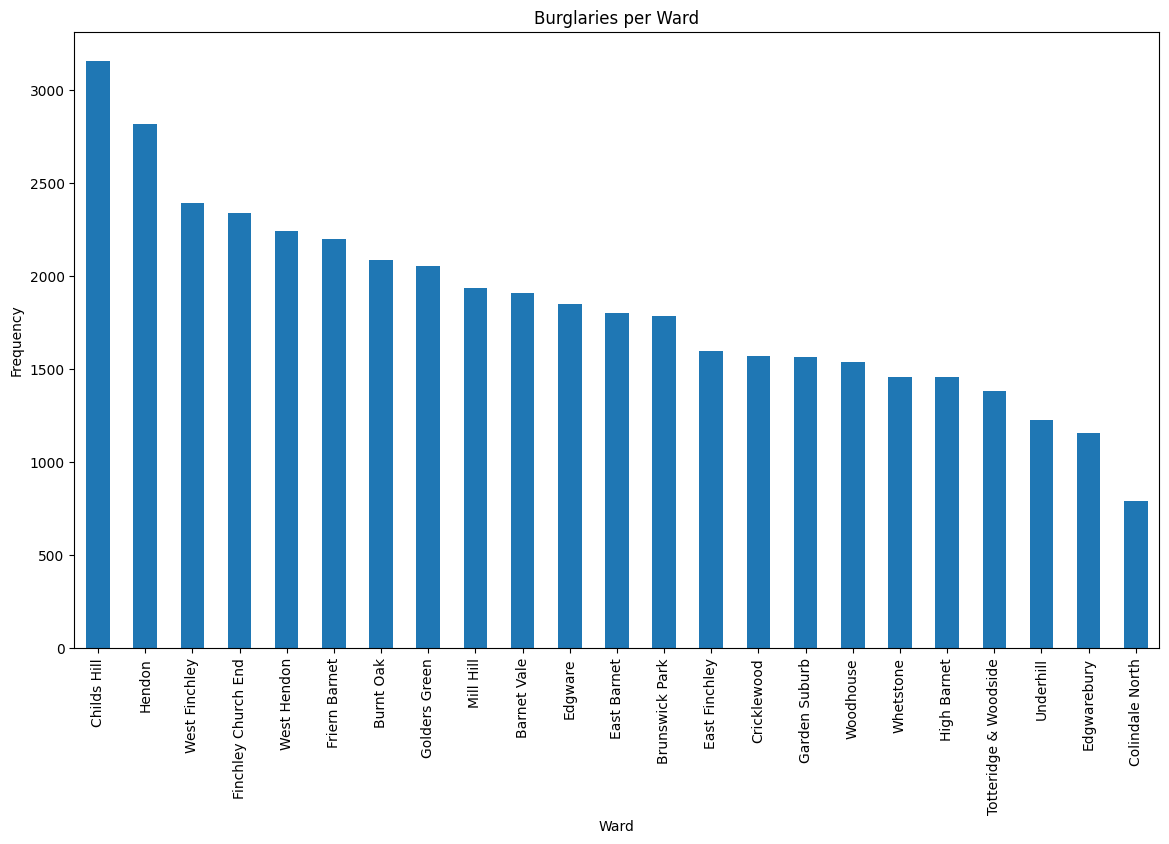

In [24]:
ax = barnet_burg_filtered['Wards'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Burglaries per Ward")
ax.set_xlabel("Ward")
ax.set_ylabel("Frequency")

In [22]:
import matplotlib.pyplot as plt
wards = ['Barnet Vale',
'Brunswick Park',
'Burnt Oak',
'Childs Hill',
'Colindale North',
'Colindale South',
'Cricklewood',
'East Barnet',
'East Finchley',
'Edgware',
'Edgwarebury',
'Finchley Church End',
'Friern Barnet',
'Garden Suburb',
'Golders Green',
'Hendon',
'High Barnet',
'Mill Hill',
'Totteridge & Woodside',
'Underhill',
'West Finchley',
'West Hendon',
'Whetstone',
'Woodhouse']

Text(0, 0.5, 'Frequency')

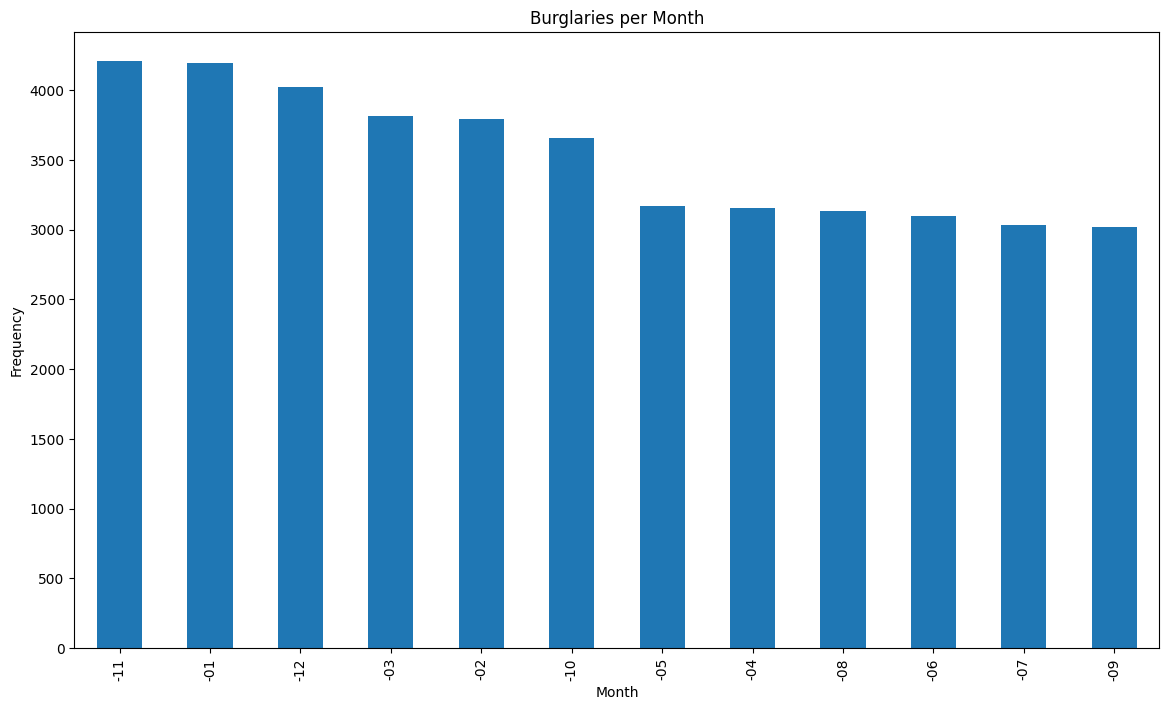

In [27]:
ax = barnet_burg_filtered['Month_season'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Burglaries per Month")
ax.set_xlabel("Month")
ax.set_ylabel("Frequency")

In [26]:
barnet_burg_filtered['Month_season'] = barnet_burg_filtered['Month'].map(lambda x: x.lstrip('0123456789').rstrip('-'))

/var/folders/9z/ph0td10d70s0yfmn7f7lywtm0000gn/T/ipykernel_7710/1654273928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barnet_burg_filtered['Month_season'] = barnet_burg_filtered['Month'].map(lambda x: x.lstrip('0123456789').rstrip('-'))


Text(0, 0.5, 'Frequency')

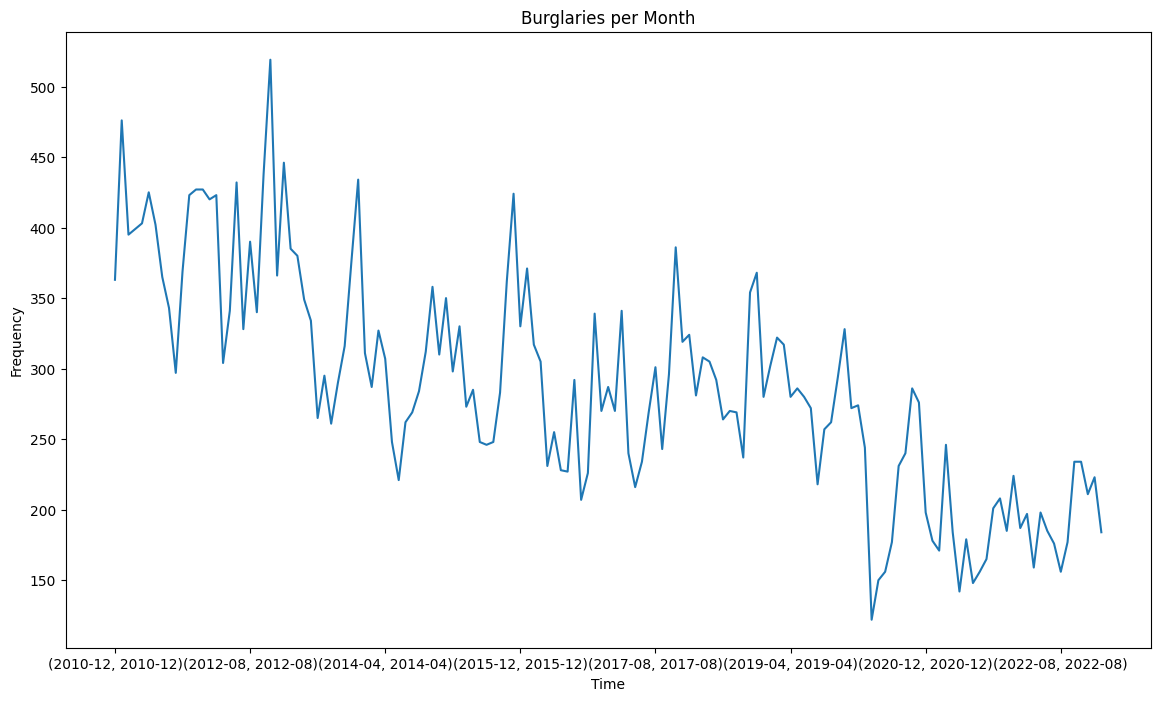

In [28]:
ax = barnet_burg_filtered.groupby('Month')['Month'].value_counts().plot(kind='line',
                                    figsize=(14,8),
                                    title="Burglaries per Month")
ax.set_xlabel("Time")
ax.set_ylabel("Frequency")

In [60]:
df_monthly = pd.DataFrame()
df_monthly['Freq'] = barnet_burg_filtered.groupby('Month')['Month'].value_counts()
freq = []
for i in range(len(df_monthly)):
    freq.append(df_monthly['Freq'][i])
freq

[363,
 476,
 395,
 399,
 403,
 425,
 402,
 365,
 343,
 297,
 369,
 423,
 427,
 427,
 420,
 423,
 304,
 341,
 432,
 328,
 390,
 340,
 438,
 519,
 366,
 446,
 385,
 380,
 349,
 334,
 265,
 295,
 261,
 290,
 316,
 376,
 434,
 311,
 287,
 327,
 307,
 248,
 221,
 262,
 269,
 284,
 312,
 358,
 310,
 350,
 298,
 330,
 273,
 285,
 248,
 246,
 248,
 283,
 362,
 424,
 330,
 371,
 317,
 305,
 231,
 255,
 228,
 227,
 292,
 207,
 226,
 339,
 270,
 287,
 270,
 341,
 240,
 216,
 234,
 269,
 301,
 243,
 296,
 386,
 319,
 324,
 281,
 308,
 305,
 292,
 264,
 270,
 269,
 237,
 354,
 368,
 280,
 302,
 322,
 317,
 280,
 286,
 280,
 272,
 218,
 257,
 262,
 294,
 328,
 272,
 274,
 244,
 122,
 150,
 156,
 177,
 231,
 240,
 286,
 276,
 198,
 178,
 171,
 246,
 184,
 142,
 179,
 148,
 156,
 165,
 201,
 208,
 185,
 224,
 187,
 197,
 159,
 198,
 185,
 176,
 156,
 177,
 234,
 234,
 211,
 223,
 184]

In [69]:
df_monthly.index = df_monthly.index.get_level_values(0)
df_monthly = df_monthly.reset_index()

In [36]:
from sklearn.linear_model import LinearRegression

In [72]:
from datetime import datetime
df_monthly['Month']=pd.to_datetime(df_monthly['Month'])
df_monthly.set_index('Month', inplace = True)

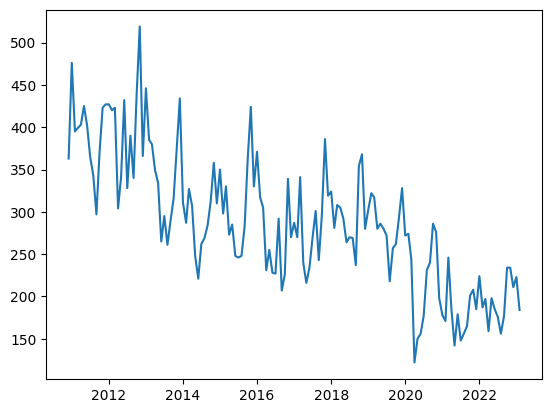

In [73]:
plt.plot(df_monthly)

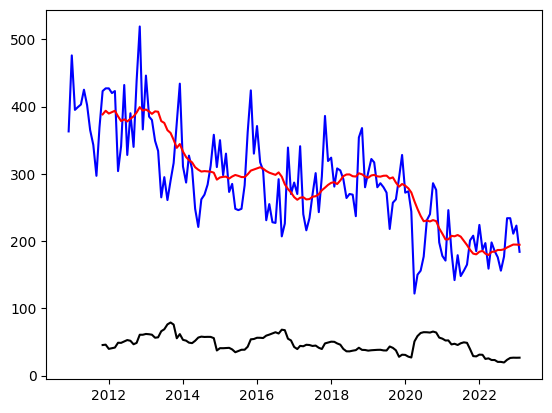

In [77]:
from statsmodels.tsa.stattools import adfuller

rolmean = df_monthly.rolling(12).mean()
rolstd = df_monthly.rolling(12).std()

plt.plot(df_monthly, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')

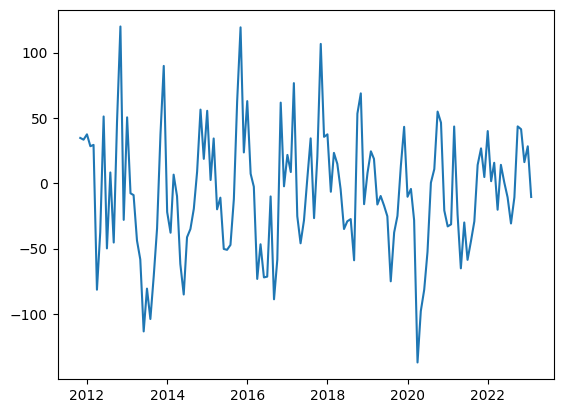

In [80]:
avg_diff = df_monthly - rolmean
avg_diff.dropna(inplace=True)
plt.plot(avg_diff)

In [164]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.3/607.3 kB 5.2 MB/s eta 0:00:0000:0100:01
  Using cached Cython-0.29.34-py2.py3-none-any.whl (988 kB)

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

2011-11-01     0.000000
2011-12-01    34.642579
2012-01-01    33.711958
2012-02-01    36.226327
2012-03-01    31.051445
                ...    
2022-10-01   -16.606613
2022-11-01    24.417936
2022-12-01     9.444662
2023-01-01    11.429270
2023-02-01     3.223661
Freq: MS, Name: predicted_mean, Length: 136, dtype: float64
                               SARIMAX Results                                
Dep. Variable:                   Freq   No. Observations:                  136
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -695.525
Date:                Thu, 11 May 2023   AIC                           1401.050
Time:                        22:16:54   BIC                           1415.577
Sample:                    11-01-2011   HQIC                          1406.953
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


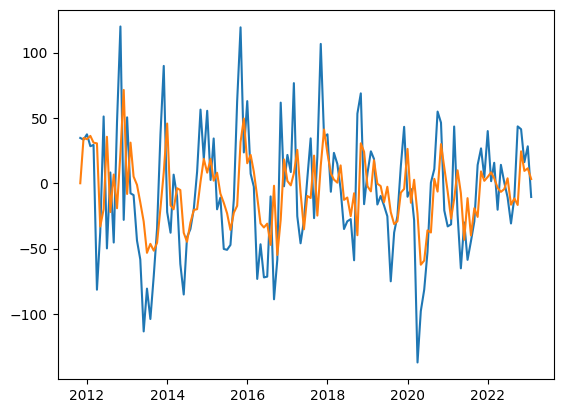

In [176]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(avg_diff, nlags=5)
lag_pacf = pacf(avg_diff, nlags = 5)

model = ARIMA(avg_diff, order=(2,1,2), method = 'CSS')
result = model.fit()
forecast = result.predict()
print(forecast)
print(result.summary())

plt.plot(avg_diff)
plt.plot(forecast)

In [112]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
adfuller(df_monthly.diff().diff().diff().dropna())

(-8.453524100484794,
 1.6380003916363973e-13,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1403.5997352502056)

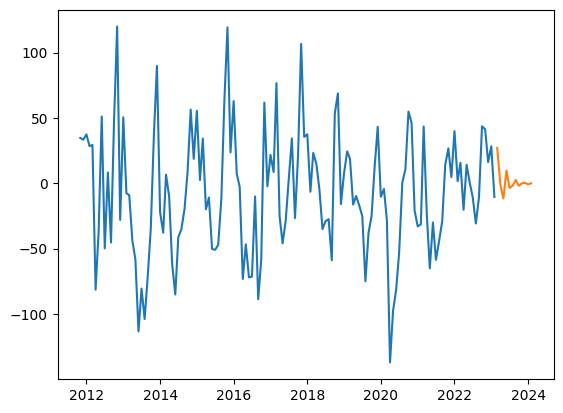

In [159]:
predict = result.forecast(steps=12)
plt.plot(avg_diff)
plt.plot(predict)

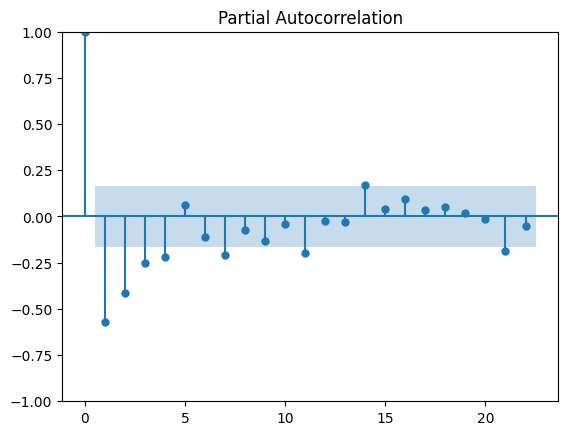

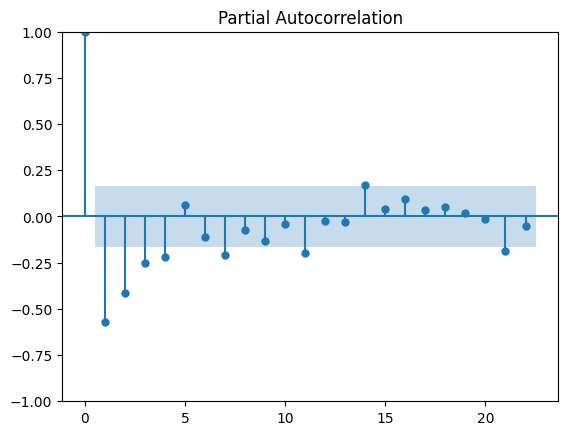

In [136]:
plot_pacf(df_monthly.diff().diff().dropna())